In [3]:
from sklearn.tree import DecisionTreeRegressor

In [4]:
# Sample data
X = [[1, 2], [3, 4], [5, 6], [7, 8]]  # Feature matrix (4 samples, 2 features)
y = [10, 20, 30, 40]  # Target values

In [5]:
# Define the model
melbourne_model = DecisionTreeRegressor()

In [6]:
print(melbourne_model)

DecisionTreeRegressor()


In [7]:
# Fit the model
melbourne_model.fit(X, y)

DecisionTreeRegressor()

In [8]:
print(melbourne_model)
type(melbourne_model)

DecisionTreeRegressor()


sklearn.tree._classes.DecisionTreeRegressor

In [9]:
# Make a prediction
prediction = melbourne_model.predict([[4, 5]])  # Predict for a new sample
print("Prediction:", prediction)


Prediction: [20.]


In [10]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Create a DecisionTreeRegressor
melbourne_model = DecisionTreeRegressor()

# Check attributes before fitting
print("Before fitting:")
print("n_features_in_: ", getattr(melbourne_model, "n_features_in_", "Not initialized"))
print("tree_: ", getattr(melbourne_model, "tree_", "Not initialized"))

# Create some training data
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([10, 20, 30, 40])

# Fit the model
melbourne_model.fit(X, y)

# Check attributes after fitting
print("\nAfter fitting:")
print("n_features_in_: ", melbourne_model.n_features_in_)
print("Feature importances: ", melbourne_model.feature_importances_)
print("tree_: ", "Initialized" if melbourne_model.tree_ else "Not initialized")


Before fitting:
n_features_in_:  Not initialized
tree_:  Not initialized

After fitting:
n_features_in_:  2
Feature importances:  [0.8 0.2]
tree_:  Initialized


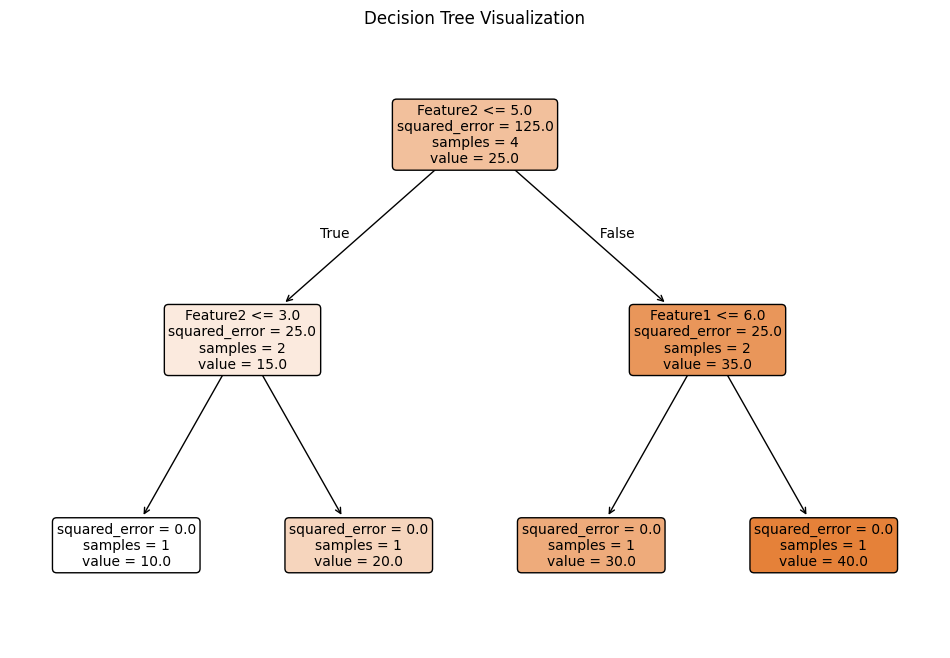

In [11]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Define and fit the model
X = [[1, 2], [3, 4], [5, 6], [7, 8]]
y = [10, 20, 30, 40]
melbourne_model = DecisionTreeRegressor()
melbourne_model.fit(X, y)

# Plot the tree
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
plot_tree(melbourne_model, 
          feature_names=["Feature1", "Feature2"],  # Names for your features
          filled=True,  # Colors the nodes based on their output values
          rounded=True,  # Rounded boxes for a cleaner look
          fontsize=10)   # Font size for text
plt.title("Decision Tree Visualization")
plt.show()


In [12]:
# !pip install graphviz

In [13]:
from sklearn.tree import export_graphviz
import graphviz

# Export the tree to a DOT file string
dot_data = export_graphviz(melbourne_model, 
                           out_file=None,  # Keep output as a string
                           feature_names=["Feature1", "Feature2"], 
                           filled=True,  # Fill colors in nodes
                           rounded=True, 
                           special_characters=True)

# Render the tree using Graphviz
graph = graphviz.Source(dot_data)
graph.render("melbourne_tree")  # Saves the tree as a file "melbourne_tree.pdf"
graph.view()  # Opens the rendered tree in your default viewer


'melbourne_tree.pdf'

In [14]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Training data
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([10, 20, 30, 40])

# Train the model
melbourne_model = DecisionTreeRegressor()
melbourne_model.fit(X, y)

# Inspect the tree structure
tree = melbourne_model.tree_

# Key attributes
print("Number of nodes:", tree.node_count)
print("Features used for splits:", tree.feature)
print("Thresholds for splits:", tree.threshold)
print("Left child indices:", tree.children_left)
print("Right child indices:", tree.children_right)
print("Values at nodes:", tree.value)
print("Number of samples at each node:", tree.n_node_samples)


Number of nodes: 7
Features used for splits: [ 1  0 -2 -2  1 -2 -2]
Thresholds for splits: [ 5.  2. -2. -2.  7. -2. -2.]
Left child indices: [ 1  2 -1 -1  5 -1 -1]
Right child indices: [ 4  3 -1 -1  6 -1 -1]
Values at nodes: [[[25.]]

 [[15.]]

 [[10.]]

 [[20.]]

 [[35.]]

 [[30.]]

 [[40.]]]
Number of samples at each node: [4 2 1 1 2 1 1]


In [15]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

0.0

In [22]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

260571.5732730794


In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [24]:
# Data Loading Code Runs At This Point
import pandas as pd
    
# Load data
melbourne_file_path = 'melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path) 
# Filter rows with missing values
filtered_melbourne_data = melbourne_data.dropna(axis=0)
# Choose target and features
y = filtered_melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = filtered_melbourne_data[melbourne_features]

from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

In [27]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
candidate_max_leaf_nodes = [num for num in range(5,501)]
my_mae_list = []
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in candidate_max_leaf_nodes:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    my_mae_list.append(my_mae)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  347380
Max leaf nodes: 6  		 Mean Absolute Error:  339508
Max leaf nodes: 7  		 Mean Absolute Error:  339435
Max leaf nodes: 8  		 Mean Absolute Error:  328758
Max leaf nodes: 9  		 Mean Absolute Error:  322210
Max leaf nodes: 10  		 Mean Absolute Error:  317645
Max leaf nodes: 11  		 Mean Absolute Error:  314469
Max leaf nodes: 12  		 Mean Absolute Error:  314158
Max leaf nodes: 13  		 Mean Absolute Error:  304281
Max leaf nodes: 14  		 Mean Absolute Error:  300997
Max leaf nodes: 15  		 Mean Absolute Error:  297063
Max leaf nodes: 16  		 Mean Absolute Error:  291884
Max leaf nodes: 17  		 Mean Absolute Error:  290247
Max leaf nodes: 18  		 Mean Absolute Error:  281748
Max leaf nodes: 19  		 Mean Absolute Error:  280245
Max leaf nodes: 20  		 Mean Absolute Error:  278571
Max leaf nodes: 21  		 Mean Absolute Error:  275359
Max leaf nodes: 22  		 Mean Absolute Error:  275423
Max leaf nodes: 23  		 Mean Absolute Error:  272755
Max leaf nodes: 2

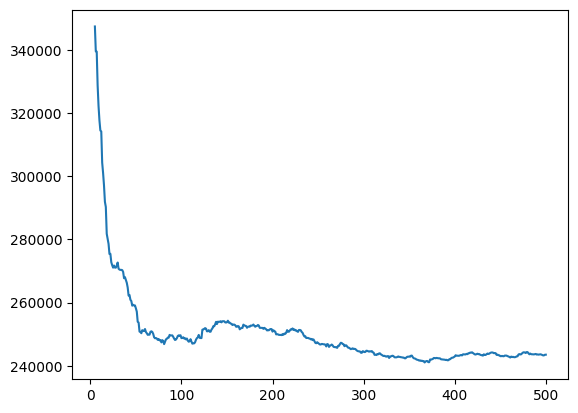

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# xpoints = np.array([1, 8])
# ypoints = np.array([3, 10])

plt.plot(candidate_max_leaf_nodes, my_mae_list)
plt.show()

In [31]:
print(min(my_mae_list))
print(my_mae_list.index(min(my_mae_list)))

241027.95803757792
362


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))